# Classifying Moller Events

In quantum field theory, electron-electron scattering is known as Moller scattering.

## Data Set

* Signal: mollers
* Background: beam-bkg

# Signal Plots

In [71]:
# This allows matplotlib plots to be shown inline
%matplotlib inline

# 
import numpy as np
import root_numpy as rnp
import matplotlib.pyplot as plt

# Open a ROOT file and create a record array out of the ROOT tree
X_rec = rnp.root2array("hps_005772.0_dst_20151010092742126_preprocessed_signal.root")

# Convert the data into an array so it can be used by scikit-learn
X = rnp.rec2array(X_rec)
print len(X)
print X

# Create the data labels
y = np.ones(len(X))
print len(y)

713
[[   0.93755502    1.03832614  -41.20615387  -60.71886063]
 [   0.18132339    1.03695023   39.65115738  -38.87403107]
 [   0.48569825    0.46937919  -96.98955536  -80.80778503]
 ..., 
 [   0.2841346     0.61386228  -15.7781744    13.17656803]
 [   0.15361139    0.35489503 -150.6410675    47.54259109]
 [   0.44935456    0.58948928  -74.58401489  -85.93288422]]
713


<matplotlib.colorbar.Colorbar instance at 0x7fea53f0eea8>

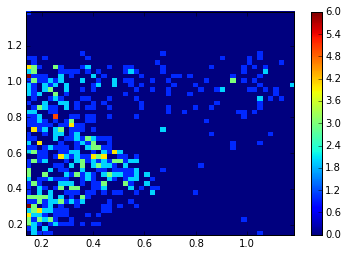

In [72]:
# Plot the energy of the highest energy cluster in the event
cluster_pair_energy_high = X_rec['cluster_pair_energy_high']
cluster_pair_energy_low = X_rec['cluster_pair_energy_low']
plt.hist2d(cluster_pair_energy_high, cluster_pair_energy_low, 50)
plt.colorbar()

(array([  5.,  13.,  12.,  18.,  20.,  19.,  18.,  17.,  13.,  21.,  20.,
         19.,  18.,  27.,  22.,  29.,  37.,  42.,  47.,  46.,  30.,  17.,
         32.,  18.,  15.,  11.,  11.,   9.,   9.,   5.,   7.,   7.,   7.,
          7.,   7.,   2.,   4.,   5.,   6.,   5.,   2.,   2.,   6.,   4.,
          7.,   4.,   3.,   5.,   1.,   2.]),
 array([ 0.31511764,  0.35342245,  0.39172726,  0.43003207,  0.46833688,
         0.50664169,  0.5449465 ,  0.58325131,  0.62155612,  0.65986093,
         0.69816574,  0.73647055,  0.77477536,  0.81308017,  0.85138498,
         0.88968979,  0.9279946 ,  0.96629941,  1.00460422,  1.04290903,
         1.08121383,  1.11951864,  1.15782345,  1.19612826,  1.23443307,
         1.27273788,  1.31104269,  1.3493475 ,  1.38765231,  1.42595712,
         1.46426193,  1.50256674,  1.54087155,  1.57917636,  1.61748117,
         1.65578598,  1.69409079,  1.7323956 ,  1.77070041,  1.80900522,
         1.84731003,  1.88561484,  1.92391965,  1.96222446,  2.00052927,
 

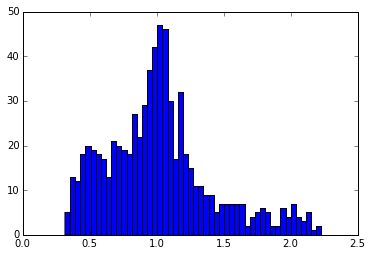

In [67]:
cluster_pair_energy_sum = cluster_pair_energy_high + cluster_pair_energy_low
plt.hist(cluster_pair_energy_sum, 50)

<matplotlib.colorbar.Colorbar instance at 0x7fea52c89a28>

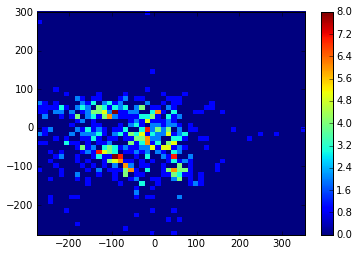

In [85]:
cluster_pair_energy_high_x = X_rec['cluster_pair_energy_high_x']
cluster_pair_energy_low_x = X_rec['cluster_pair_energy_low_x']
plt.hist2d(cluster_pair_energy_high_x, cluster_pair_energy_low_x, 50)
plt.colorbar()

# Preprocessing Background Monte Carlo Files

The beam-tri background that will be used in training the classifier will be preprocessed in a manner similar to the pure Moller signal sample described above.  However, because a beam-tri sample without Mollers does not exist, it will also be required that the energy of one of the clusters in a pair have an energy greater than 0.8 GeV. This assures that only background events are being tagged as such.

In [86]:
# The module that will be used to preprocess the background file
import MollerBkgPreprocessor as mpbkg

#
bkg_preprocessor = mpbkg.MollerBkgPreprocessor()
bkg_preprocessor.preprocess("/home/omoreno/work/hps/data/engrun2015/pass2/mc_1pt05/dst/beam_tri/egsv3-triv2-g4v1_s2d6_HPS-EngRun2015-Nominal-v3_3.4.0_singles1_1.root")

ImportError: No module named MollerBkgPreprocessor

# Background

In [76]:
# Open a ROOT file and create a record array out of the ROOT tree
X_bkg_rec = rnp.root2array("egsv3-triv2-g4v1_s2d6_HPS-EngRun2015-Nominal-v3_3.4.0_singles1_1_preprocessed_bkg.root")

# Convert the data into an array so it can be used by scikit-learn
X_bkg = rnp.rec2array(X_rec)
print len(X_bkg)
print X_bkg

# Create the data labels
y_bkg = np.zeros(len(X_bkg))
print len(y_bkg)

713
[[   0.93755502    1.03832614  -41.20615387  -60.71886063]
 [   0.18132339    1.03695023   39.65115738  -38.87403107]
 [   0.48569825    0.46937919  -96.98955536  -80.80778503]
 ..., 
 [   0.2841346     0.61386228  -15.7781744    13.17656803]
 [   0.15361139    0.35489503 -150.6410675    47.54259109]
 [   0.44935456    0.58948928  -74.58401489  -85.93288422]]
713


<matplotlib.colorbar.Colorbar instance at 0x7fea539291b8>

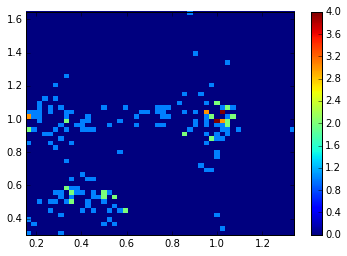

In [77]:
# Plot the energy of the highest energy cluster in the event
cluster_pair_energy_high = X_bkg_rec['cluster_pair_energy_high']
cluster_pair_energy_low = X_bkg_rec['cluster_pair_energy_low']
plt.hist2d(cluster_pair_energy_high, cluster_pair_energy_low, 50)
plt.colorbar()

(array([  1.,   2.,   0.,   1.,   0.,   3.,   2.,   0.,   2.,   8.,   8.,
          5.,   7.,   6.,   9.,   5.,   2.,   7.,   4.,   4.,   6.,   9.,
          3.,   3.,   2.,   0.,   2.,   3.,   2.,   4.,   2.,   4.,   7.,
          6.,   4.,   6.,  12.,  10.,   7.,   7.,   2.,   1.,   0.,   1.,
          1.,   0.,   1.,   0.,   0.,   1.]),
 array([ 0.48854348,  0.52907141,  0.56959935,  0.61012728,  0.65065521,
         0.69118315,  0.73171108,  0.77223901,  0.81276695,  0.85329488,
         0.89382281,  0.93435075,  0.97487868,  1.01540661,  1.05593455,
         1.09646248,  1.13699041,  1.17751835,  1.21804628,  1.25857421,
         1.29910215,  1.33963008,  1.38015801,  1.42068595,  1.46121388,
         1.50174181,  1.54226974,  1.58279768,  1.62332561,  1.66385354,
         1.70438148,  1.74490941,  1.78543734,  1.82596528,  1.86649321,
         1.90702114,  1.94754908,  1.98807701,  2.02860494,  2.06913288,
         2.10966081,  2.15018874,  2.19071668,  2.23124461,  2.27177254,
 

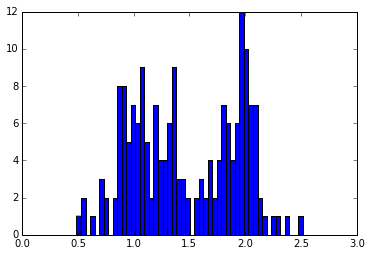

In [78]:
cluster_pair_energy_sum = cluster_pair_energy_high + cluster_pair_energy_low
plt.hist(cluster_pair_energy_sum, 50)

(array([  2.,   3.,   4.,   6.,   4.,   3.,   1.,   2.,   7.,   1.,   5.,
          5.,   1.,   3.,   1.,   3.,   1.,   2.,   2.,   6.,   7.,  11.,
          8.,   6.,   6.,   5.,   8.,  15.,  11.,   9.,  10.,   6.,   6.,
          2.,   2.,   3.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([-0.9269295 , -0.894695  , -0.8624605 , -0.83022599, -0.79799149,
        -0.76575699, -0.73352248, -0.70128798, -0.66905347, -0.63681897,
        -0.60458447, -0.57234996, -0.54011546, -0.50788096, -0.47564645,
        -0.44341195, -0.41117745, -0.37894294, -0.34670844, -0.31447393,
        -0.28223943, -0.25000493, -0.21777042, -0.18553592, -0.15330142,
        -0.12106691, -0.08883241, -0.05659791, -0.0243634 ,  0.0078711 ,
         0.04010561,  0.07234011,  0.10457461,  0.13680912,  0.16904362,
         0.20127812,  0.23351263,  0.26574713,  0.29798163,  0.33021614,
         0.36245064,  0.39468515,  0.42691965,  0.45915415,  0.49138866,
 

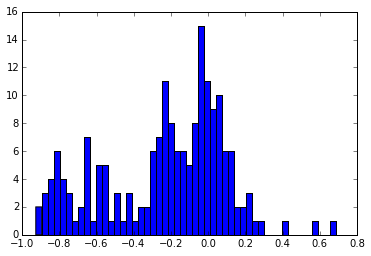

In [81]:
cluster_pair_energy_diff = cluster_pair_energy_high - cluster_pair_energy_low
plt.hist(cluster_pair_energy_diff, 50)

<matplotlib.colorbar.Colorbar instance at 0x7fea53544320>

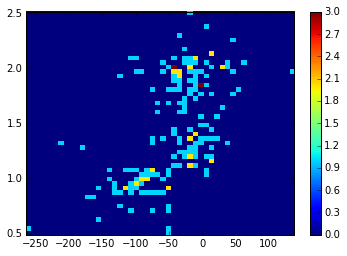

In [80]:
plt.hist2d(cluster_pair_energy_high_x, cluster_pair_energy_sum, 50)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fea53aabf80>

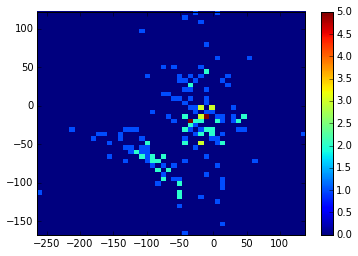

In [75]:
cluster_pair_energy_high_x = X_bkg_rec['cluster_pair_energy_high_x']
cluster_pair_energy_low_x = X_bkg_rec['cluster_pair_energy_low_x']
plt.hist2d(cluster_pair_energy_high_x, cluster_pair_energy_low_x, 50)
plt.colorbar()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   2.,   2.,   3.,   1.,   6.,  11.,  14.,
         10.,   9.,   0.,   0.,   2.,   2.,   5.,   4.,   6.,  10.,  14.,
         12.,   7.,  14.,  12.,   8.,   5.,   4.,   5.,   2.,   1.,   1.,
          3.,   0.,   2.,   1.,   0.,   2.]),
 array([-378.01903534, -368.00055558, -357.98207581, -347.96359605,
        -337.94511629, -327.92663652, -317.90815676, -307.889677  ,
        -297.87119723, -287.85271747, -277.83423771, -267.81575794,
        -257.79727818, -247.77879842, -237.76031865, -227.74183889,
        -217.72335913, -207.70487936, -197.6863996 , -187.66791984,
        -177.64944007, -167.63096031, -157.61248055, -147.59400078,
        -137.57552102, -127.55704126, -117.53856149, -107.52008173,
         -97.50160197,  -87.4831222 ,  -77.46464244,  -67.44616268,
         -57.42768291,  -47.40920315,  -37.39072339,  -27.37224362,
         -17.35376386,   -7.3352841 ,    2.683

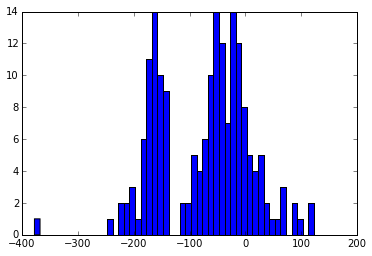

In [83]:
cluster_x_sum = cluster_pair_energy_high_x + cluster_pair_energy_low_x
plt.hist(cluster_x_sum, 50)

(array([  1.,   0.,   1.,   0.,   0.,   0.,   3.,   0.,   2.,   2.,   3.,
          1.,   1.,   2.,   4.,   4.,   3.,   6.,   4.,  10.,   5.,   6.,
          4.,   7.,  11.,  15.,  10.,  14.,   5.,  10.,   7.,   8.,   2.,
          6.,   6.,   5.,   3.,   2.,   0.,   0.,   1.,   2.,   1.,   1.,
          2.,   0.,   0.,   0.,   0.,   2.]),
 array([ -2.03708267e+02,  -1.96165293e+02,  -1.88622318e+02,
         -1.81079343e+02,  -1.73536369e+02,  -1.65993394e+02,
         -1.58450419e+02,  -1.50907445e+02,  -1.43364470e+02,
         -1.35821496e+02,  -1.28278521e+02,  -1.20735546e+02,
         -1.13192572e+02,  -1.05649597e+02,  -9.81066225e+01,
         -9.05636478e+01,  -8.30206732e+01,  -7.54776986e+01,
         -6.79347240e+01,  -6.03917493e+01,  -5.28487747e+01,
         -4.53058001e+01,  -3.77628255e+01,  -3.02198508e+01,
         -2.26768762e+01,  -1.51339016e+01,  -7.59092697e+00,
         -4.79523468e-02,   7.49502228e+00,   1.50379969e+01,
          2.25809715e+01,   3.01239462

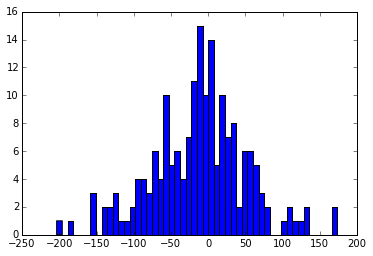

In [84]:
cluster_x_diff = cluster_pair_energy_high_x - cluster_pair_energy_low_x
plt.hist(cluster_x_diff, 50)

# Decision Tree

In [53]:
# Merge the signal and background
X = np.concatenate((X, X_bkg), axis=0)

In [55]:
y = np.concatenate((y, y_bkg), axis=0)

In [56]:
from sklearn import tree

In [57]:
tree_clf = tree.DecisionTreeClassifier()

In [58]:
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

# Neural Network